In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
folder = 'Fig/'

In [15]:
def m_t(amplitude, frequency):
    t = np.linspace(0, 1, 1000) 
    return amplitude * np.cos(2 * np.pi * frequency * t), t

f = 10
A = 1

m , t = m_t(A,f)

df = pd.DataFrame( {'Tempo': t, 
                    'Amplitude(V)':m}
    )
df.set_index('Tempo')
df.to_csv(folder+'sinal_mensagem.csv')

In [16]:
def sinal_modulado(A_m , f_m, f_c):
    A_c = 1
    m , t = m_t(A_m,f_m)
    c_t  =A_c * np.cos(2 * np.pi * f_c * t)
    
    return c_t*m , m, t

f_m = 5
A_m = 1
f_c = 100

s, m,t = sinal_modulado(A_m , f_m, f_c)


df = pd.DataFrame( {'Tempo': t, 
                    'Amplitude(V)':s,
                    'Mensagem': m}
    )
df.set_index('Tempo')
df.to_csv(folder+'sinal_am_dsbsc.csv')

    

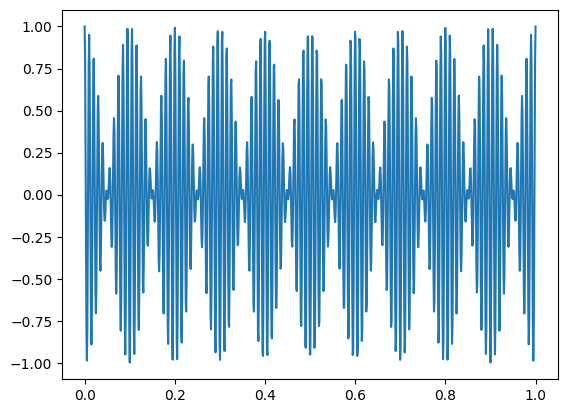

In [17]:
plt.plot(t,s)

In [18]:
def espectro_am_dsb(A_m , f_c , f_m ):
   u_t, m_t, t = sinal_modulado(A_m , f_m, f_c)
   fs = 1/(t[1] - t[0])
   U_f = np.fft.fftshift(np.fft.fft(u_t))
   f = np.linspace(-fs/2,fs/2,len(u_t))
   return U_f, f


f_m = 10
A_m = 1
f_c = 200

U_f, f = espectro_am_dsb(A_m , f_c , f_m )


df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_dsbsc.csv')

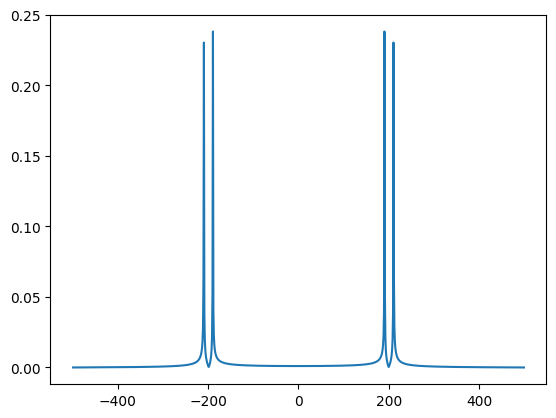

In [19]:
plt.plot(f,np.abs(U_f)/len(f))

In [20]:
f_m = 10
A_m = 1
f_c = 200

u_t, m_t, t = sinal_modulado(A_m , f_m, f_c)

u_demod = u_t * np.cos(2*np.pi*f_c*t)
U_demod_f = np.fft.fftshift(np.fft.fft(u_demod))


df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f),
                    'Amplitude2(V)':np.abs(U_demod_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_dsbsc.csv')